In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  8 18:10:21 2020

@author: giacomo
"""

'\nCreated on Sun Nov  8 18:10:21 2020\n\n@author: giacomo\n'

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy.integrate import odeint, solve_ivp
from matplotlib import pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

In [3]:
N = 1e4
perc_inf = 0.1
days = 1000
beta = 0.2
tau = 20
tar = 10

In [4]:
def SEIR(perc_inf, beta, tau, tar, days):
    # calculate constants
    frac_inf = perc_inf/100
    gamma = 1/tau
    mu = 1/tar
    R0 = beta/mu

    y0 = np.array([(1-frac_inf), 0, frac_inf, 0])
    y = y0

    def ddt(t, y):
        return np.array([-beta*y[0]*y[2],                   # ds/dt
                         beta*y[0]*y[2] - gamma*y[1],       # de/dt
                         gamma*y[1] - mu*y[2],              # di/dt
                         mu*y[2]])                          # dr/dt

    y = solve_ivp(fun=ddt, t_span=(0, days), y0=y0)

    plt.figure()
    plt.plot(y.t, y.y.T)
    # plt.legend(["s", "e", "i", "r"])
    plt.legend(["Susceptible", "Exposed", "Infected", "Recovered"])
    plt.text(0.8*days, 0.9, r'$R_{0}$ ='+str(np.round(R0, 2)))
    plt.xlabel('Days')
    plt.ylabel('Relative population')

    return y, R0

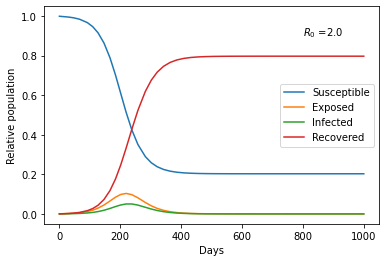

In [5]:
y, R0 = SEIR(perc_inf, beta, tau, tar, days)

g = 1-(1/R0)

In [6]:
interact(SEIR, perc_inf=FloatSlider(min=0, max=5, step=0.01, value=0.1, description='Fraction of infected', style=style, layout=slider_layout),
               beta=FloatSlider(min=0, max=0.5, step=0.02, value=0.2, description='Probability of infection', style=style, layout=slider_layout),
               tau=IntSlider(min=0, max=30, step=1, value=20, description='Incubation time', style=style, layout=slider_layout),
               tar=IntSlider(min=0, max=30, step=1, value=10, description='Recovery time', style=style, layout=slider_layout), 
               days=IntSlider(min=0, max=1200, step=100, value=900, description='Number of days', style=style, layout=slider_layout))

interactive(children=(FloatSlider(value=0.1, description='Fraction of infected', layout=Layout(width='99%'), m…

<function __main__.SEIR(perc_inf, beta, tau, tar, days)>